In [4]:
import torch
import gpytorch
import matplotlib.pyplot as plt

# Define the data points with a slightly wider range
train_x = torch.linspace(-0.5, 1.5, 100)
train_y = torch.sin(train_x * (2 * 3.1416)) + torch.randn(train_x.size()) * 0.2

# Create a GP model class
class ExactGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(ExactGPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

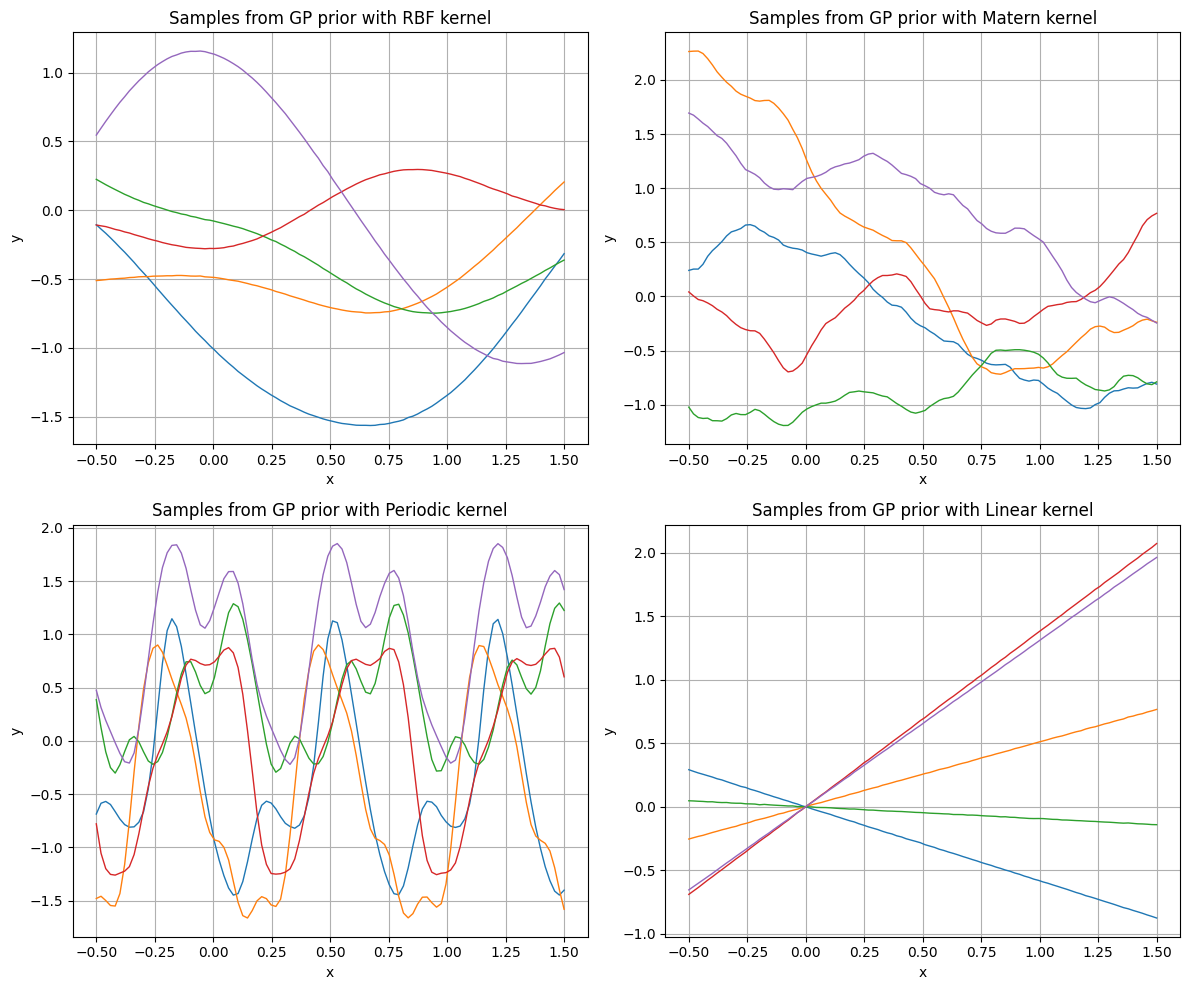

In [11]:
# Initialize likelihood and model
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGPModel(train_x, train_y, likelihood)

# Set the model and likelihood to training mode
model.train()
likelihood.train()

# Define the number of samples to draw
num_samples = 5

# Define the covariance functions to use
kernel_names = ['RBF', 'Matern', 'Periodic', 'Linear']

# Plot the samples
plt.figure(figsize=(12, 10))
for i, kernel_name in enumerate(kernel_names):
    with torch.no_grad():
        # Change the kernel based on the kernel_name
        if kernel_name == 'RBF':
            model.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())
        elif kernel_name == 'Matern':
            model.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.MaternKernel(nu=1.5))
        elif kernel_name == 'Periodic':
            model.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.PeriodicKernel())
        elif kernel_name == 'Linear':
            model.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.LinearKernel())

        # Sample from the GP prior
        samples = model(train_x).sample(sample_shape=torch.Size([num_samples]))

        # Plot the samples
        plt.subplot(2, 2, i + 1)
        for j in range(num_samples):
            plt.plot(train_x.numpy(), samples[j].numpy(), linewidth=1)

        plt.title('Samples from GP prior with ' + kernel_name + ' kernel')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.grid(True)

plt.tight_layout()
plt.savefig("priors")
plt.show()

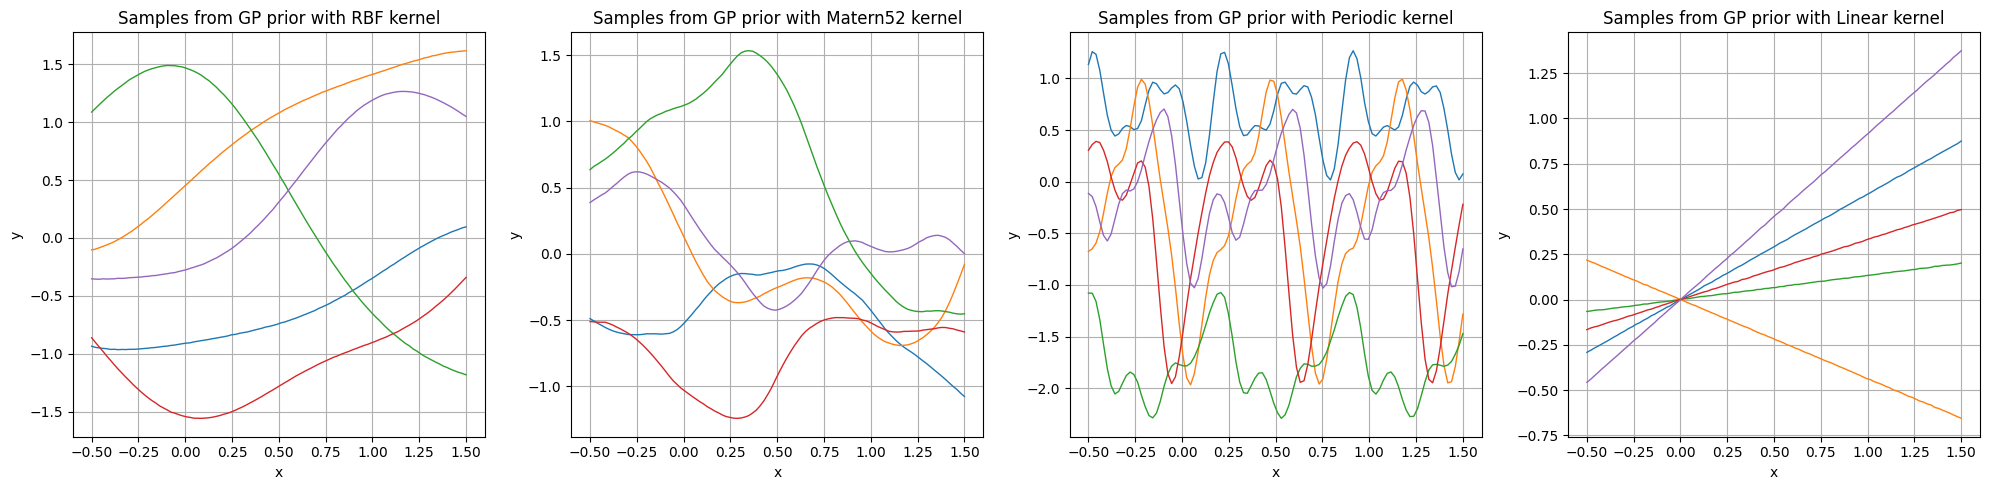

In [16]:
# Initialize likelihood and model
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGPModel(train_x, train_y, likelihood)

# Set the model and likelihood to training mode
model.train()
likelihood.train()

# Define the number of samples to draw
num_samples = 5

# Define the covariance functions to use
kernel_names = ['RBF', 'Matern52', 'Periodic', 'Linear']

# Plot the samples side by side
plt.figure(figsize=(20, 5))
for i, kernel_name in enumerate(kernel_names):
    with torch.no_grad():
        # Change the kernel based on the kernel_name
        if kernel_name == 'RBF':
            model.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())
        elif kernel_name == 'Matern52':
            model.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.MaternKernel(nu=2.5))
        elif kernel_name == 'Periodic':
            model.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.PeriodicKernel())
        elif kernel_name == 'Linear':
            model.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.LinearKernel())

        # Sample from the GP prior
        samples = model(train_x).sample(sample_shape=torch.Size([num_samples]))

        # Plot the samples
        plt.subplot(1, len(kernel_names), i + 1)
        for j in range(num_samples):
            plt.plot(train_x.numpy(), samples[j].numpy(), linewidth=1)

        plt.title('Samples from GP prior with ' + kernel_name + ' kernel')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.grid(True)

plt.tight_layout()
plt.savefig("priors!")
plt.show()